# Capstone 2: Feature Engineering

In our previous notebook, we wrangled our data and did some EDA, in which we gained some insight on burial trends in the UK. We found 1) over 70% of end-of-life disposition was cremation for the UK population in 2019 2) cremation is cheaper than traditional burial in regards to fees 3) cremation fees for the most part are around 750-960 pounds 4) the most expensive crematoriums are located central and south of UK. The cremation fees cover year 2020. For number of cremations, we looked at 2019 (from January to end of December) and found Crematoriums in each recorded district cremated approximately 900-2000 bodies in 2019.

In this portion, our goal is to create a cleaned dataset we can use to complete the modeling step of your project. Here are the steps:

**Steps:**
1. Create dummy or indicator features for categorical variables - We may want to apply this to two different datasets that we have, and specifically to columns Cremation or Burial as well as Crematoria.
2. Addres skew in data. For 'Cremation or Burial' dataset: Age at Death and Cost to LA in pounds. For 'Crematoria': Cremations from 1 Jan-31 Dec 2019, 1 Jan-31 Dec 2020, Total Since Opening, January 2020 Basic Creamtion Fee in pounds, January 2021 Basic Cremation Fee in pounds and Total Crematorium Charges in pounds. 
3. Standardize the magnitude of numeric features using a scaler - We will want to standardize values as we likely will be using linear regression and perhaps some distance based classification models.
4. Split into testing and training datasets

### 3.0 Imports

In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

import scipy
import pandas.util.testing as tm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### 3.1 Import datasets

### 3.3 Cremation or Burial dataset

In [90]:
path = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Capstone-Traditional-vs-Nontraditional-Burial-Analysis\df.xlsx'
df = pd.read_excel(path)
df.head()

,Year,Date of Birth,Date of Death,Age at Death,Gender,Next of Kin,Cost to LA in pounds,Cremation or Burial
0,2011-2012,25.06.1957,05.04.2011,53,Male,No,214.0,Crem
1,2011-2012,12.07.1971,18.08.2011,40,Male,No,1002.0,Crem
2,2011-2012,02.07.1948,21.12.2011,63,Male,Yes,150.0,Crem
3,2012-2013,23.01.1942,26.05.2012,70,Male,Yes,187.0,Crem
4,2012-2013,11.05.1950,27.08.2012,62,Male,No,68.0,Crem


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  43 non-null     object 
 1   Date of Birth         43 non-null     object 
 2   Date of Death         43 non-null     object 
 3   Age at Death          43 non-null     int64  
 4   Gender                43 non-null     object 
 5   Next of Kin           43 non-null     object 
 6   Cost to LA in pounds  43 non-null     float64
 7   Cremation or Burial   43 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.8+ KB


In [92]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending=False)

,count,%
Year,0,0.0
Date of Birth,0,0.0
Date of Death,0,0.0
Age at Death,0,0.0
Gender,0,0.0
Next of Kin,0,0.0
Cost to LA in pounds,0,0.0
Cremation or Burial,0,0.0


In [93]:
df.dtypes

Year                     object
Date of Birth            object
Date of Death            object
Age at Death              int64
Gender                   object
Next of Kin              object
Cost to LA in pounds    float64
Cremation or Burial      object
dtype: object

#### Conversions 

In [94]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

In [95]:
df['Date of Death'] = pd.to_datetime(df['Date of Death'])

In [96]:
df_final = df.drop(columns='Year')

In [97]:
df_final.head()

,Date of Birth,Date of Death,Age at Death,Gender,Next of Kin,Cost to LA in pounds,Cremation or Burial
0,1957-06-25,2011-05-04,53,Male,No,214.0,Crem
1,1971-12-07,2011-08-18,40,Male,No,1002.0,Crem
2,1948-02-07,2011-12-21,63,Male,Yes,150.0,Crem
3,1942-01-23,2012-05-26,70,Male,Yes,187.0,Crem
4,1950-11-05,2012-08-27,62,Male,No,68.0,Crem


In [98]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date of Birth         43 non-null     datetime64[ns]
 1   Date of Death         43 non-null     datetime64[ns]
 2   Age at Death          43 non-null     int64         
 3   Gender                43 non-null     object        
 4   Next of Kin           43 non-null     object        
 5   Cost to LA in pounds  43 non-null     float64       
 6   Cremation or Burial   43 non-null     object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 2.5+ KB


#### Convert categorical variable, Cremation or Buriall, into indicator variables or dummy

In [99]:
burial_subset = df_final[['Age at Death', 'Gender','Cost to LA in pounds', 'Cremation or Burial']]

In [100]:
burial_dummies = pd.get_dummies(burial_subset['Cremation or Burial'], prefix='Cremation or Burial') 
ds = pd.concat([burial_subset, burial_dummies], axis = 1)

In [101]:
ds

,Age at Death,Gender,Cost to LA in pounds,Cremation or Burial,Cremation or Burial_Burial,Cremation or Burial_Crem
0,53,Male,214.00,Crem,0,1
1,40,Male,1002.00,Crem,0,1
2,63,Male,150.00,Crem,0,1
3,70,Male,187.00,Crem,0,1
4,62,Male,68.00,Crem,0,1
5,81,Male,1392.00,Crem,0,1
6,44,Female,1005.00,Crem,0,1
7,79,Female,1060.00,Crem,0,1
8,60,Male,1103.00,Crem,0,1
9,84,Female,1216.00,Crem,0,1


In [102]:
ds = ds[ds['Cremation or Burial'].notna()]

In [103]:
ds

,Age at Death,Gender,Cost to LA in pounds,Cremation or Burial,Cremation or Burial_Burial,Cremation or Burial_Crem
0,53,Male,214.00,Crem,0,1
1,40,Male,1002.00,Crem,0,1
2,63,Male,150.00,Crem,0,1
3,70,Male,187.00,Crem,0,1
4,62,Male,68.00,Crem,0,1
5,81,Male,1392.00,Crem,0,1
6,44,Female,1005.00,Crem,0,1
7,79,Female,1060.00,Crem,0,1
8,60,Male,1103.00,Crem,0,1
9,84,Female,1216.00,Crem,0,1


In [104]:
# Repeat for Gender
gender_dummies = pd.get_dummies(ds['Gender'], prefix='Gender') 
ds = pd.concat([ds, gender_dummies], axis = 1)
ds.head()

,Age at Death,Gender,Cost to LA in pounds,Cremation or Burial,Cremation or Burial_Burial,Cremation or Burial_Crem,Gender_Female,Gender_Male
0,53,Male,214.0,Crem,0,1,0,1
1,40,Male,1002.0,Crem,0,1,0,1
2,63,Male,150.0,Crem,0,1,0,1
3,70,Male,187.0,Crem,0,1,0,1
4,62,Male,68.0,Crem,0,1,0,1


In [105]:
ds['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [106]:
ds_ = ds.head(10)

In [107]:
ds_.head()

,Age at Death,Gender,Cost to LA in pounds,Cremation or Burial,Cremation or Burial_Burial,Cremation or Burial_Crem,Gender_Female,Gender_Male
0,53,Male,214.0,Crem,0,1,0,1
1,40,Male,1002.0,Crem,0,1,0,1
2,63,Male,150.0,Crem,0,1,0,1
3,70,Male,187.0,Crem,0,1,0,1
4,62,Male,68.0,Crem,0,1,0,1


#### Get numerical values into new dataset

In [108]:
num_set = ds.select_dtypes(include=['int', 'float'])
num_set.head()

,Cost to LA in pounds
0,214.0
1,1002.0
2,150.0
3,187.0
4,68.0


In [109]:
data = ds_[['Cost to LA in pounds', 'Cremation or Burial_Burial', 'Cremation or Burial_Crem', 'Gender_Female', 'Gender_Male']]

In [110]:
# split into inputs and outputs
X, y = data.iloc[:, :-1], ds_.iloc[:, -1]

In [111]:
print(X.shape, y.shape)

(10, 4) (10,)


#### Split - train and test set

In [116]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7, 4) (3, 4) (7,) (3,)


In [117]:
from sklearn.ensemble import RandomForestRegressor
# fit the model
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [118]:
# make predictions
y_hat = model.predict(X_test)

<AxesSubplot:xlabel='Gender_Male', ylabel='Density'>

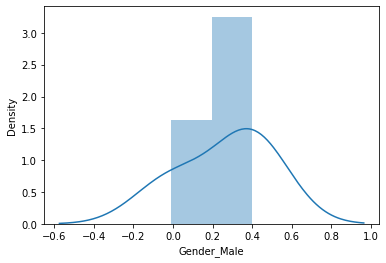

In [119]:
sns.distplot(y_hat-y_test)

#### Using Standard Scaler on numeric features

In [120]:
num_subset = df_final[['Cremation or Burial','Cost to LA in pounds','Age at Death']]
num_subset.head()

,Cremation or Burial,Cost to LA in pounds,Age at Death
0,Crem,214.0,53
1,Crem,1002.0,40
2,Crem,150.0,63
3,Crem,187.0,70
4,Crem,68.0,62


In [121]:
num_subset = num_subset[num_subset['Cremation or Burial'].notna()]

In [122]:
num_subset.isnull().sum()

Cremation or Burial     0
Cost to LA in pounds    0
Age at Death            0
dtype: int64

In [123]:
# Repeat splitting into train and test set
x = num_subset.iloc[:, -1].values
y = num_subset.iloc[:, 1].values

In [124]:
y

array([ 214.  , 1002.  ,  150.  ,  187.  ,   68.  , 1392.  , 1005.  ,
       1060.  , 1103.  , 1216.  , 1167.  ,  195.  , 1081.  , 1197.  ,
       1103.  , 1174.  , 1114.  ,  396.  ,  427.  ,  346.  ,    8.  ,
       1173.  , 1369.  , 1247.  ,  122.7 , 3625.  , 1313.  , 1210.  ,
       1227.  , 1562.  , 1311.  , 1209.  , 1234.  , 1637.  ,   55.  ,
       1453.  , 1271.  , 1266.  , 1142.75, 1084.25, 1317.  , 1270.  ,
       1339.  ])

In [125]:
x

array([53, 40, 63, 70, 62, 81, 44, 79, 60, 84, 71, 67, 74, 52, 79, 52, 60,
       65, 70, 70, 83, 45, 64, 56, 85, 68, 59, 33, 56, 78, 63, 65, 65, 86,
       71, 60, 71, 68, 80, 80, 69, 58, 70], dtype=int64)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [127]:
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler_x = StandardScaler()
scaler_y = StandardScaler()
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [131]:
Xs = scaler_x.fit_transform(X_test)
Ys = np.squeeze(scaler_y.fit_transform(y_test.reshape(-1, 1)))

In [132]:
models = LinearRegression()
models.fit(Xs, Ys)

LinearRegression()

In [133]:
y_pred = models.predict(Xs)
y_pred

array([-0.09917624,  0.31736395, -0.99176236, -0.03967049,  0.19835247,
        0.31736395,  0.25785821, -0.15868198,  0.19835247])

<AxesSubplot:ylabel='Density'>

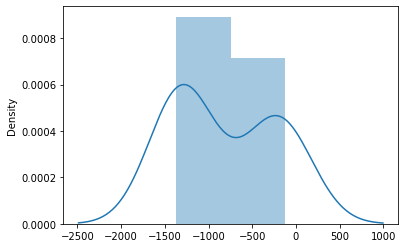

In [134]:
sns.distplot(y_pred-y_test)

### 3.4 Crematoria dataset

In [178]:
path2 = r'C:\Users\yuvem\OneDrive\Documents\GitHub\Personal-Capstone-Projects\Capstone-Traditional-vs-Nontraditional-Burial-Analysis\xl3_.xlsx'
xl3 = pd.read_excel(path2)
xl3.head()

,Crematoria,Latitude,Longtitude,1 Jan-31 Dec 2019,1 Jan-31 Dec 2020,Total Since Opening,January 2020 Basic Cremation Fee in pounds,January 2021 Basic Cremation Fee in pounds,Total Crematorium Charges in pounds
0,Bedford,52.155162,-0.411665,1744,1824,85432,810,810,810
1,Luton,51.911291,-0.389880,1565,1884,128685,760,760,760
2,Bracknell,51.391328,-0.780324,2009,2396,69774,875,875,875
3,Reading,51.475829,-0.955201,1646,1898,135794,810,810,810
4,Slough,51.523431,-0.592800,1358,1368,89237,795,795,795


In [179]:
xl3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Crematoria                                  62 non-null     object 
 1   Latitude                                    62 non-null     float64
 2   Longtitude                                  62 non-null     float64
 3   1 Jan-31 Dec 2019                           62 non-null     int64  
 4   1 Jan-31 Dec 2020                           62 non-null     int64  
 5   Total Since Opening                         62 non-null     int64  
 6   January 2020 Basic Cremation Fee in pounds  62 non-null     int64  
 7   January 2021 Basic Cremation Fee in pounds  62 non-null     int64  
 8   Total Crematorium Charges in pounds         62 non-null     int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 4.5+ KB


array([[<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longtitude'}>,
        <AxesSubplot:title={'center':'1 Jan-31 Dec 2019'}>],
       [<AxesSubplot:title={'center':'1 Jan-31 Dec 2020'}>,
        <AxesSubplot:title={'center':'Total Since Opening'}>,
        <AxesSubplot:title={'center':'January 2020 Basic Cremation Fee in pounds'}>],
       [<AxesSubplot:title={'center':'January 2021 Basic Cremation Fee in pounds'}>,
        <AxesSubplot:title={'center':'Total Crematorium Charges in pounds'}>,
        <AxesSubplot:>]], dtype=object)

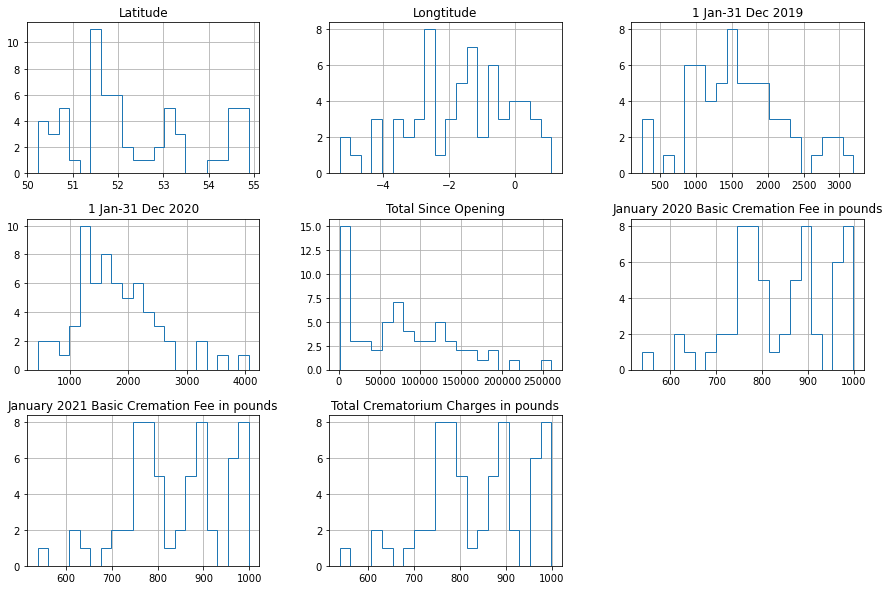

In [180]:
xl3.hist(figsize=(15,10), bins=20, histtype='step')

#### 3.5 Create Features

#### Fix skewness

(array([ 7.,  8.,  3.,  3.,  6., 13.,  9.,  6.,  5.,  2.]),
 array([-1.80021   , -1.42301563, -1.04582125, -0.66862688, -0.29143251,
         0.08576186,  0.46295623,  0.8401506 ,  1.21734498,  1.59453935,
         1.97173372]),
 <BarContainer object of 10 artists>)

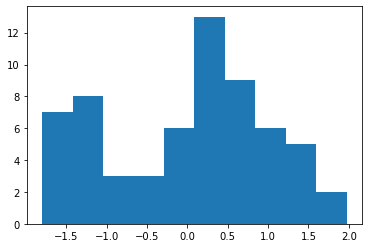

In [181]:
# Test positive skewness for Total Since Opening
powertransformer = PowerTransformer(standardize=True)

pos_skew_test = powertransformer.fit_transform(xl3[['Total Since Opening']])
plt.hist(pos_skew_test)

array([[<AxesSubplot:title={'center':'Total Since Opening'}>,
        <AxesSubplot:title={'center':'normal Total Since Opening'}>]],
      dtype=object)

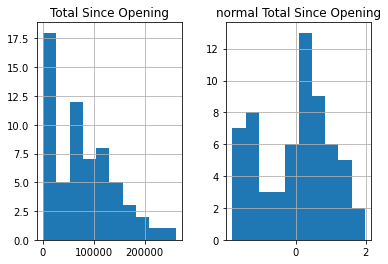

In [182]:
tot_since_open_ds = pd.DataFrame(pos_skew_test, columns=['normal Total Since Opening'])

pandas_ds = xl3[['Total Since Opening']]

test_df = pd.concat([pandas_ds, tot_since_open_ds], axis=1)
test_df.hist()

We have three more datasets that are skewed: 'January 2020 Basic Cremation Fee in pounds', 'January 2021 Basic Cremation Fee in pounds', and 'Total Crematorium Charges in pounds'. 

In [183]:
xl3_skew = xl3.drop(['Crematoria','Latitude', 'Longtitude', '1 Jan-31 Dec 2019', '1 Jan-31 Dec 2020'], axis=1)

xl3_skew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Total Since Opening                         62 non-null     int64
 1   January 2020 Basic Cremation Fee in pounds  62 non-null     int64
 2   January 2021 Basic Cremation Fee in pounds  62 non-null     int64
 3   Total Crematorium Charges in pounds         62 non-null     int64
dtypes: int64(4)
memory usage: 2.1 KB


array([[<AxesSubplot:title={'center':'norm_Total Since Opening'}>,
        <AxesSubplot:title={'center':'norm_January 2020 Basic Cremation Fee in pounds'}>],
       [<AxesSubplot:title={'center':'norm_January 2021 Basic Cremation Fee in pounds'}>,
        <AxesSubplot:title={'center':'norm_Total Crematorium Charges in pounds'}>]],
      dtype=object)

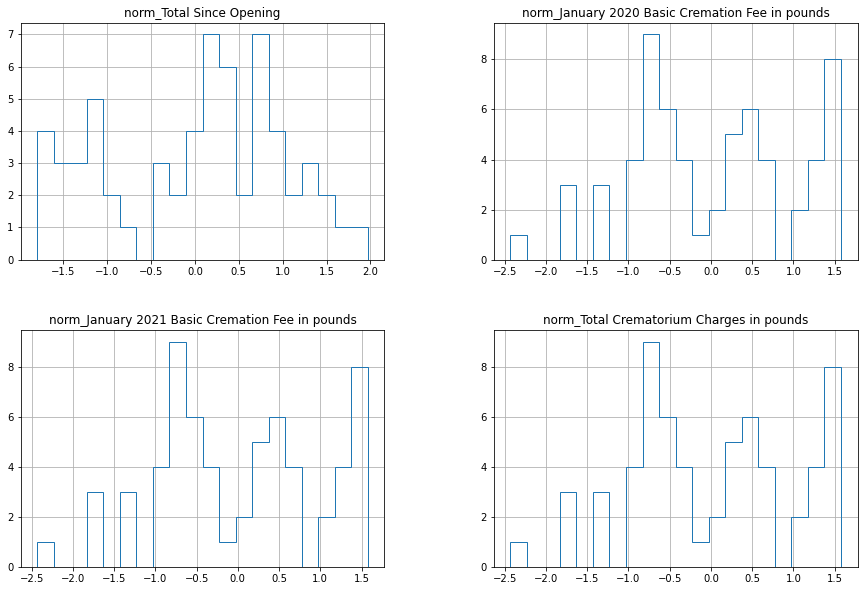

In [184]:
# Instantiate PowerTransformer
# Apply xl3_skew

powertransformer = PowerTransformer()
xl3_noskew = powertransformer.fit_transform(xl3_skew)

# create list of updated column names
col_names = xl3_skew.columns
updated_cnames = ['norm_' + i for i in col_names]

# create new df and plot histogram of all variables to see if there still is skew

xl3_noskew = pd.DataFrame(xl3_noskew, columns=updated_cnames)
xl3_noskew.hist(figsize=(15,10), bins=20,histtype='step')

In [185]:
xl3_noskew

,norm_Total Since Opening,norm_January 2020 Basic Cremation Fee in pounds,norm_January 2021 Basic Cremation Fee in pounds,norm_Total Crematorium Charges in pounds
0,0.376612,-0.319396,-0.319396,-0.319396
1,0.875557,-0.763394,-0.763394,-0.763394
2,0.161008,0.294209,0.294209,0.294209
3,0.947910,-0.319396,-0.319396,-0.319396
4,0.425555,-0.455164,-0.455164,-0.455164
...,...,...,...,...
57,-0.836506,1.264243,1.264243,1.264243
58,-1.599971,0.053360,0.053360,0.053360
59,1.337429,-0.544454,-0.544454,-0.544454
60,1.636252,0.591186,0.591186,0.591186


#### Merge unskewed data into the variables dropped

In [186]:
xl3_noskew = pd.concat([xl3[['Crematoria','Latitude', 'Longtitude', '1 Jan-31 Dec 2019', '1 Jan-31 Dec 2020']], xl3_noskew], axis=1)
xl3_noskew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Crematoria                                       62 non-null     object 
 1   Latitude                                         62 non-null     float64
 2   Longtitude                                       62 non-null     float64
 3   1 Jan-31 Dec 2019                                62 non-null     int64  
 4   1 Jan-31 Dec 2020                                62 non-null     int64  
 5   norm_Total Since Opening                         62 non-null     float64
 6   norm_January 2020 Basic Cremation Fee in pounds  62 non-null     float64
 7   norm_January 2021 Basic Cremation Fee in pounds  62 non-null     float64
 8   norm_Total Crematorium Charges in pounds         62 non-null     float64
dtypes: float64(6), int64(2), object(1)


Since PowerTransformer already normalizes features with mean of 0, we don't need to apply StandardScaler here.

### 3.6 Create Dummy Variables for Crematoria

In [187]:
xl3_noskew['Crematoria'].value_counts()

Hartlepool           1
Truro                1
Northwich            1
Luton                1
Harlow               1
                    ..
Southend-on-Sea      1
Bristol (Canford)    1
Colchester           1
Bournemouth          1
Bracknell            1
Name: Crematoria, Length: 62, dtype: int64

In [188]:
# create dummy variables for Regional indicator

dummy_df = pd.get_dummies(xl3_noskew['Crematoria'])
dummy_df

,Alfreton (Amber Valley),Amersham (Chilterns),Aston-on-Trent (Trent Valley),Aylesbury Vale,Barnstaple,Barrow-in-Furness,Basildon,Bedford,Beetham Hall,Bierton,...,Torquay,Truro,Warrington,Wear Valley,Weeley,West Berkshire (Thatcham),Westerleigh,Weymouth,Whimple (East Devon),Widnes
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [189]:
# Merge dummy variables with unskewed data

xl3_final = pd.concat([xl3_noskew, dummy_df], axis=1)
xl3_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 71 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Crematoria                                       62 non-null     object 
 1   Latitude                                         62 non-null     float64
 2   Longtitude                                       62 non-null     float64
 3   1 Jan-31 Dec 2019                                62 non-null     int64  
 4   1 Jan-31 Dec 2020                                62 non-null     int64  
 5   norm_Total Since Opening                         62 non-null     float64
 6   norm_January 2020 Basic Cremation Fee in pounds  62 non-null     float64
 7   norm_January 2021 Basic Cremation Fee in pounds  62 non-null     float64
 8   norm_Total Crematorium Charges in pounds         62 non-null     float64
 9   Alfreton (Amber Valley)           

### 3.7 Split - train and test set

In [208]:
xl3_final = xl3_final[['norm_Total Since Opening', 'norm_January 2020 Basic Cremation Fee in pounds','norm_January 2021 Basic Cremation Fee in pounds', 'norm_Total Crematorium Charges in pounds']]

In [217]:
xl3_final = xl3_final.head(10)

In [218]:
# split into inputs and outputs
X2, y2 = data.iloc[:, :-1], xl3_final.iloc[:, -1]

In [219]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3,random_state = 1)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(7, 4) (3, 4) (7,) (3,)


In [220]:
model = RandomForestRegressor(random_state=1)
model.fit(X2_train, y2_train)

RandomForestRegressor(random_state=1)

In [221]:
# make predictions
y2_hat = model.predict(X2_test)

<AxesSubplot:xlabel='norm_Total Crematorium Charges in pounds', ylabel='Density'>

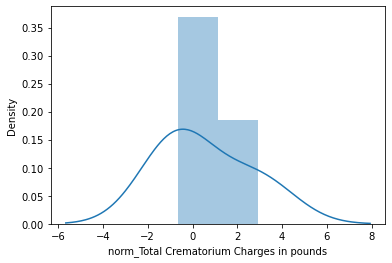

In [222]:
sns.distplot(y2_hat-y2_test)